In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pdf = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
pdf

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


in this data we have 907 rows and 27 coulmns in which both categorical and continuous dta is present and there is one target 
variables and other are independent variables

In [3]:
pdf.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

there are so many columns which is identity or name of particular object there fore its not so contributing in target
variable so that weremove this columns from database 

In [3]:
pdf.drop(["country","country_long","name","gppd_idnr","owner","url","wepp_id"],axis=1,inplace=True)
pdf.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,Central Electricity Authority,WRI,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,Central Electricity Authority,WRI,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
pdf.shape

(907, 20)

In [9]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   capacity_mw               907 non-null    float64
 1   latitude                  861 non-null    float64
 2   longitude                 861 non-null    float64
 3   primary_fuel              907 non-null    object 
 4   other_fuel1               198 non-null    object 
 5   other_fuel2               1 non-null      object 
 6   other_fuel3               0 non-null      float64
 7   commissioning_year        527 non-null    float64
 8   source                    907 non-null    object 
 9   geolocation_source        888 non-null    object 
 10  year_of_capacity_data     519 non-null    float64
 11  generation_gwh_2013       0 non-null      float64
 12  generation_gwh_2014       398 non-null    float64
 13  generation_gwh_2015       422 non-null    float64
 14  generation

In [10]:
for i in pdf.columns:
    print(pdf[i].nunique())
    print(pdf[i].value_counts())

361
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64
836
19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64
827
71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64
8
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
3
Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64
1
Oil    1
Name: other_fuel2, dtype: int64
0
Series([], Name: other_fuel3, dtype: int64)
73
2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0    

In [4]:
# there are some columns wehave in which only one categories is present in entire columns so that it is not contributing to target hence remoe this type of columns
# and also some columns is blank to whole columns or entire columns with nan hence remove this type of columns from data
pdf.drop(['source','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh',
         'generation_data_source'], axis=1, inplace=True)

In [7]:
print("now size of our dataset :\n", pdf.shape)

now size of our dataset :
 (907, 14)


In [5]:
# checking type of data
pdf.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
other_fuel2             object
other_fuel3            float64
commissioning_year     float64
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [6]:
# checking the nulls values
pdf.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
other_fuel2            906
other_fuel3            907
commissioning_year     380
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [11]:
# lets fill the nullsvalues with the aaprox values by using particular method to

pdf['latitude'] = pdf['latitude'].fillna(pdf['latitude'].mean())
pdf['longitude'] = pdf['longitude'].fillna(pdf['longitude'].mean())
pdf['commissioning_year']= pdf['commissioning_year'].fillna(pdf['commissioning_year'].mean())
pdf['other_fuel1']=pdf['other_fuel1'].fillna(pdf['other_fuel1'].mode()[0])


In [ ]:
# we see that entire columns with nulls or one values present so that we drop this columns becuse its not possible to fill this
pdf.drop(['other_fuel2','other_fuel3'], axis=1 , inplace= True)

In [12]:
pdf['geolocation_source']=pdf['geolocation_source'].fillna(pdf['geolocation_source'].mode()[0])
pdf['generation_gwh_2014']=pdf['generation_gwh_2014'].fillna(pdf['generation_gwh_2014'].mean())
pdf['generation_gwh_2015']= pdf['generation_gwh_2015'].fillna(pdf['generation_gwh_2015'].mean())
pdf['generation_gwh_2016'] = pdf['generation_gwh_2016'].fillna(pdf['generation_gwh_2016'].mean())
pdf['generation_gwh_2017']= pdf['generation_gwh_2017'].fillna(pdf['generation_gwh_2017'].mean())
pdf['generation_gwh_2018']= pdf['generation_gwh_2018'].fillna(pdf['generation_gwh_2018'].mean())

In [13]:
# again  checking nulls
pdf.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [12]:
# check the statistics of data
pdf.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


in thhis we see no nan value present so nice to proceed

there are somecolumns in which standard deviationd more than mean hence possibliyyto outlier present 
we also check skewness of data and all other values is well manner the mean value is greater than 50 percentile hence no issue to create in dataset and also meen is greater than std deviation
hence no need to worry about columns

In [18]:
pdf.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

<Figure size 500x600 with 0 Axes>

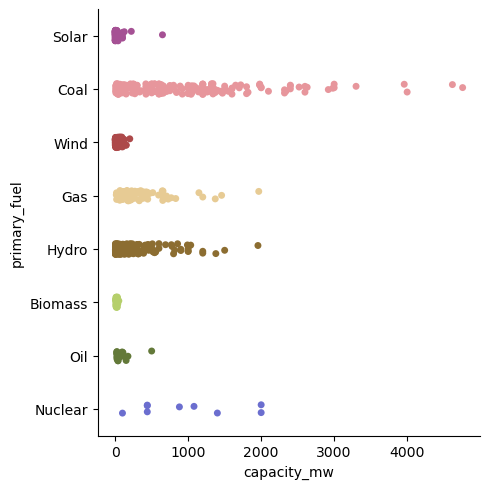

In [21]:
# checking visualiztion of data
plt.figure(figsize= (5,6))
sns.catplot(x='capacity_mw',y='primary_fuel',data=pdf,palette='tab20b_r',kind= 'strip')
plt.show()

in this primary col is alsocontribute to capacity coal and hydro  are more use to genrate capacity

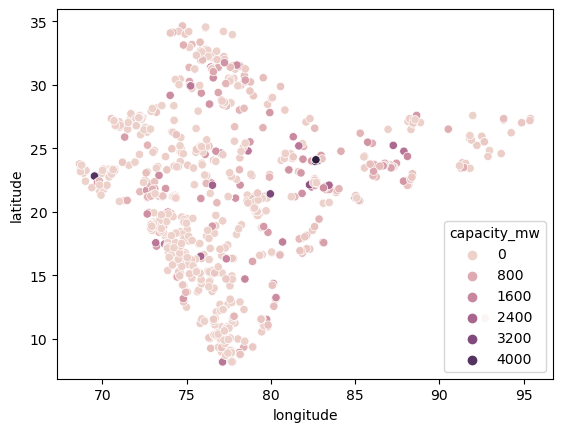

In [26]:
sns.scatterplot(x='longitude',y='latitude',data=pdf,hue='capacity_mw')
plt.show()

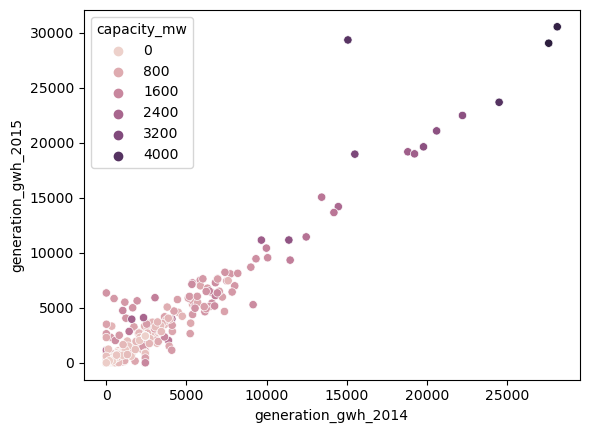

In [27]:
sns.scatterplot(x='generation_gwh_2014',y='generation_gwh_2015',data=pdf,hue='capacity_mw')
plt.show()

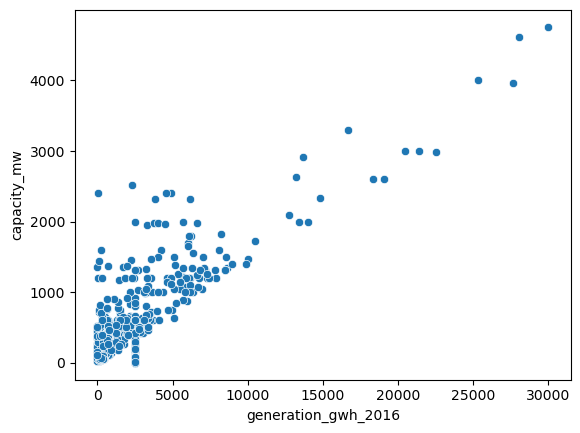

In [28]:
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',data=pdf)
plt.show()

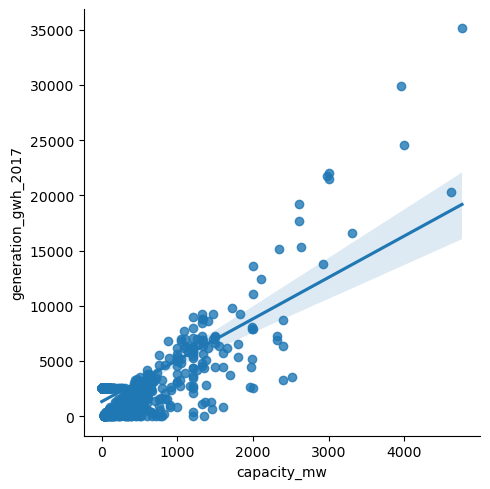

In [29]:
sns.lmplot(x= 'capacity_mw', y= 'generation_gwh_2017',data =pdf, palette= 'colourblind')

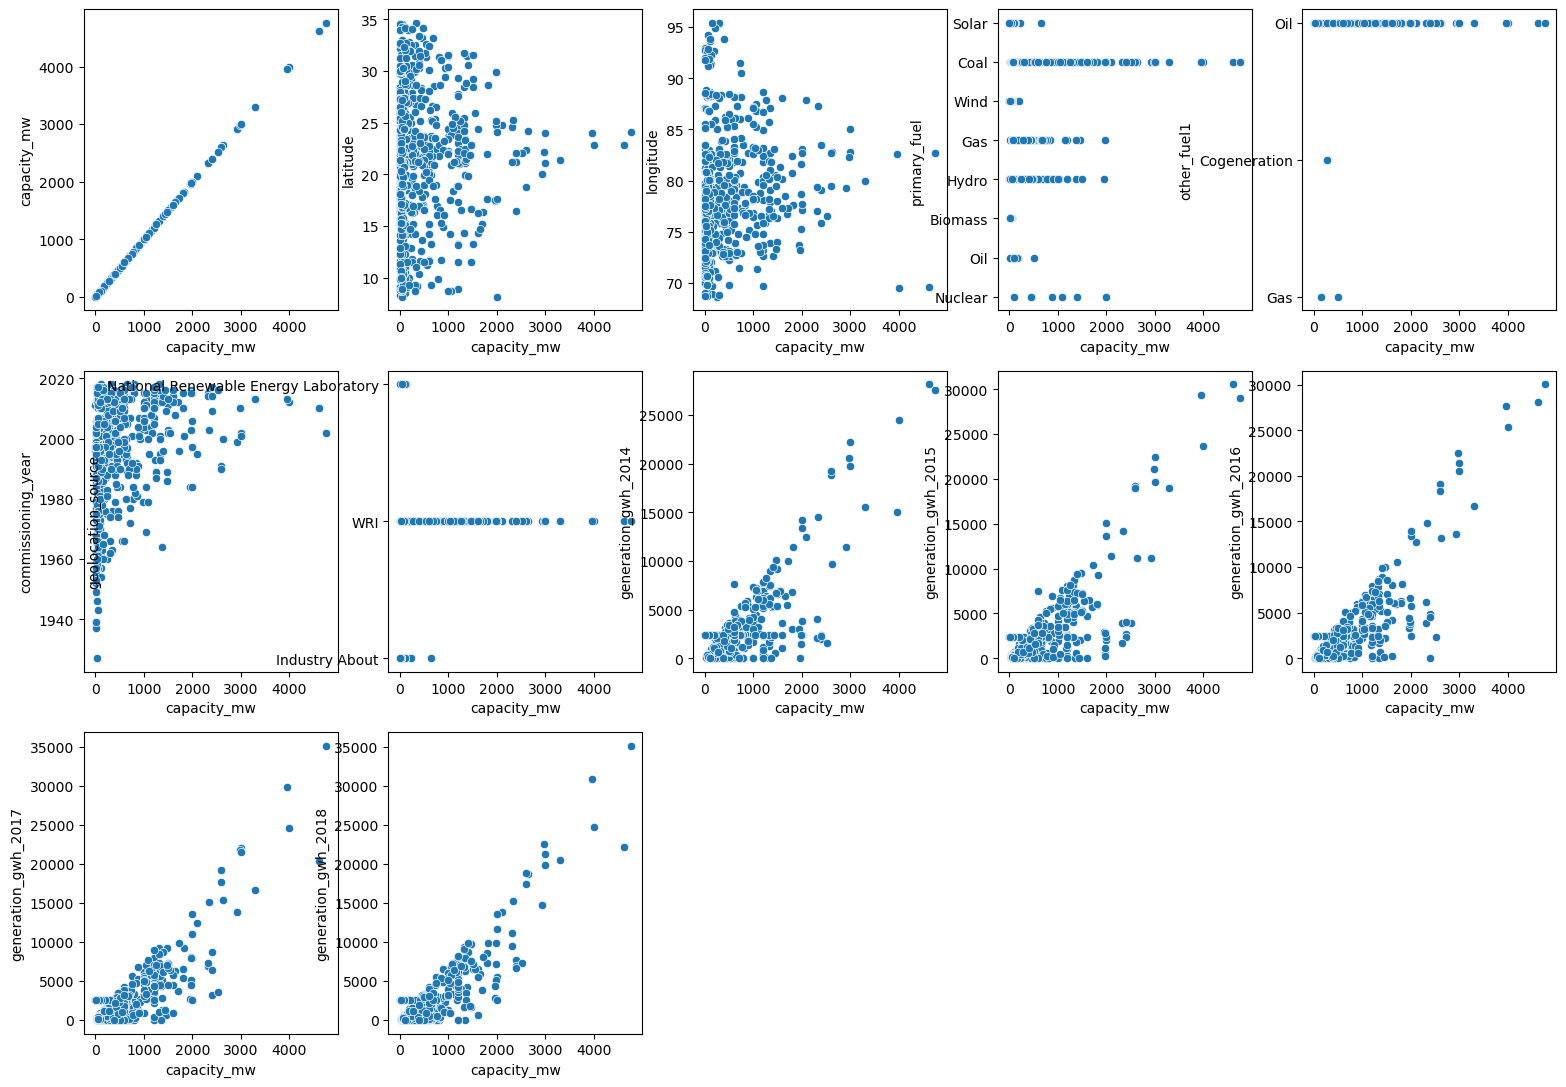

In [15]:
plt.figure(figsize=(19,18))
p=1
for i in pdf:
    if p<=14:
        plt.subplot(4,5,p)
        sns.scatterplot(x='capacity_mw',y=i,data=pdf)
        plt.xlabel('capacity_mw')
        plt.ylabel(i)
    p+=1
plt.show()    

we see that all columns are contributing to our target therfore we take all columns as feature to buildour model

In [14]:
numerical_col=[]
for i in pdf.dtypes.index:
    if pdf.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col) 

numerical columns: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


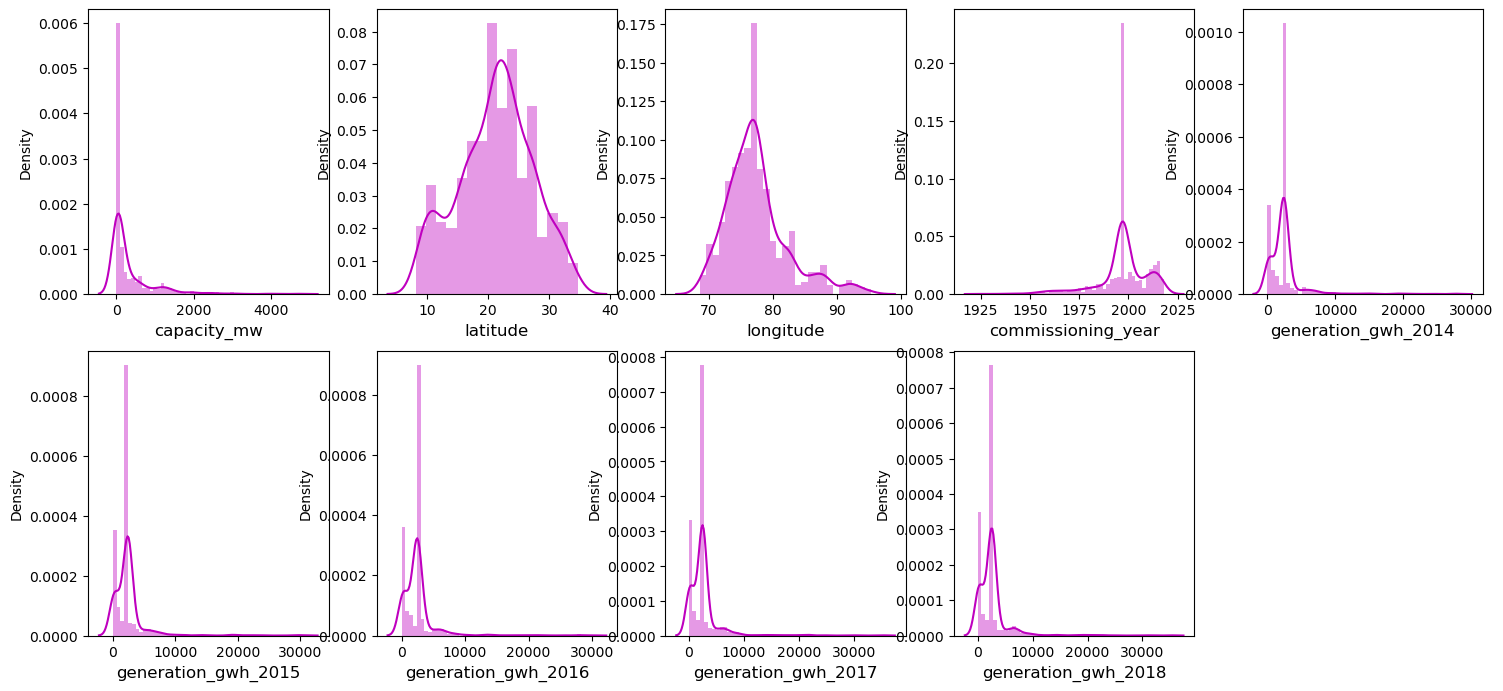

In [20]:
# checking the distribution of our data
plt.figure(figsize=(18,17), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=14:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(pdf[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [15]:
#cheking skewness of data
pdf.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

In [16]:
#removibng skewness using cube root method
pdf['longitude']= np.cbrt(pdf['longitude'])
pdf['commissioning_year']= np.cbrt(pdf['commissioning_year'])
pdf['generation_gwh_2014']= np.cbrt(pdf['generation_gwh_2014'])
pdf['generation_gwh_2015']= np.cbrt(pdf['generation_gwh_2015'])
pdf['generation_gwh_2016']= np.cbrt(pdf['generation_gwh_2016'])
pdf['generation_gwh_2017 ']= np.cbrt(pdf['generation_gwh_2017'])
pdf['generation_gwh_2018']= np.cbrt(pdf['generation_gwh_2018'])

In [17]:
# again check 
pdf.skew()

capacity_mw             3.123576
latitude               -0.149698
longitude               1.002134
commissioning_year     -1.422813
generation_gwh_2014    -0.371187
generation_gwh_2015    -0.269579
generation_gwh_2016    -0.279323
generation_gwh_2017     5.110952
generation_gwh_2018    -0.316915
generation_gwh_2017    -0.331857
dtype: float64

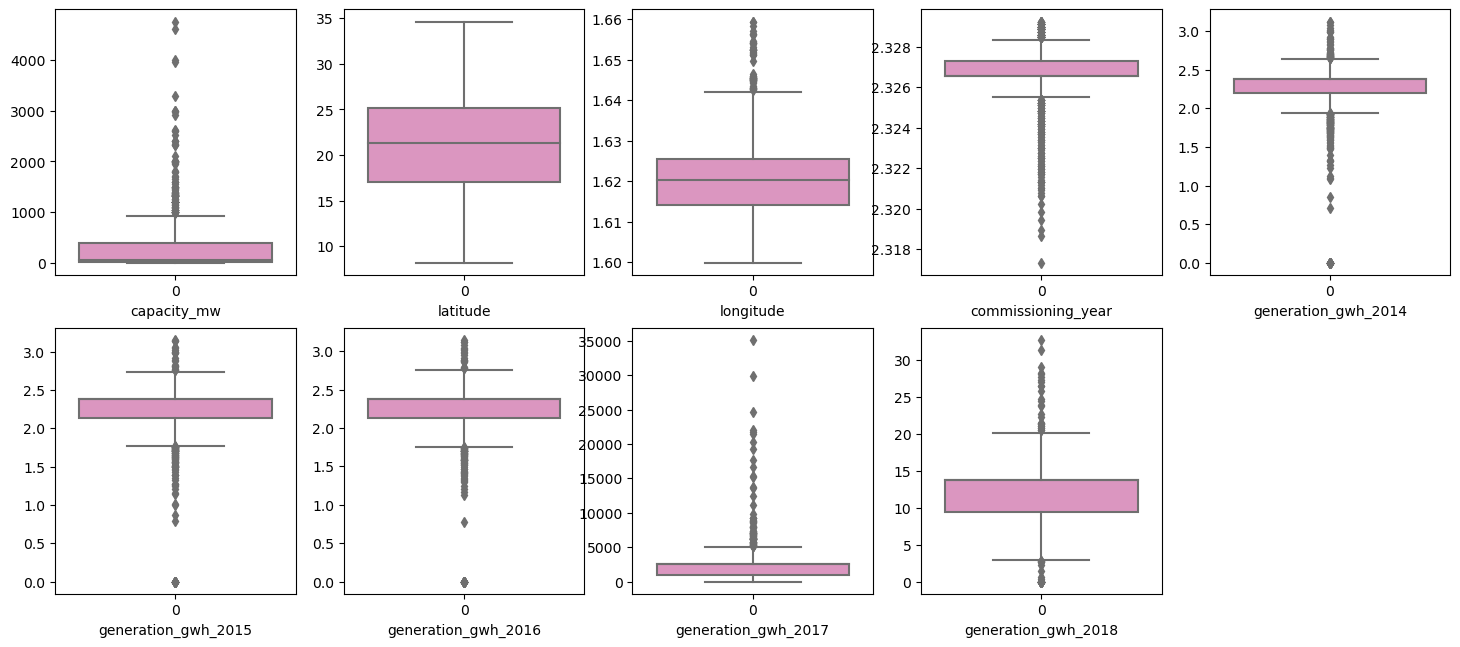

In [25]:
# cheking theoutliers by using boxplot method
plt.figure(figsize=(18,20))
p=1
for i in  numerical_col:
    if p<=25:
        plt.subplot(5,5,p)
        sns.boxplot(pdf[i], palette= 'Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()

In [18]:
# there are so many columns outliers present remove it by usin zscore method
from scipy.stats import zscore

out_features = pdf[['longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                   'generation_gwh_2017','generation_gwh_2018']]
z= np.abs(zscore(out_features))
z

,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.892687,1.065575,0.311080,0.329243,0.332664,3.114824e-16,0.338536
1,0.593158,0.002176,0.311080,0.329243,0.332664,3.114824e-16,0.338536
2,1.760007,0.002176,0.311080,0.329243,0.332664,3.114824e-16,0.338536
3,2.808168,0.531009,0.810291,0.537332,0.501019,6.452243e-01,0.724252
4,1.047925,1.370484,0.545707,1.337780,1.377524,9.718925e-01,1.489566
...,...,...,...,...,...,...,...
902,0.002532,1.446649,0.311080,2.372090,1.235889,5.761719e-01,0.669837
903,0.168603,0.002176,0.311080,0.329243,0.332664,3.114824e-16,0.338536
904,0.382577,0.002176,0.311080,0.329243,0.332664,3.114824e-16,0.338536
905,0.781270,0.002176,0.311080,0.329243,0.332664,3.114824e-16,0.338536


In [19]:
#threshold=3
np.where(z>3)

(array([ 15, 143, 179, 183, 209, 222, 244, 308, 323, 333, 340, 342, 360,
        364, 364, 364, 364, 371, 416, 427, 444, 454, 478, 484, 493, 493,
        493, 493, 493, 494, 494, 494, 494, 494, 519, 538, 541, 573, 577,
        583, 592, 601, 621, 638, 648, 648, 648, 648, 648, 657, 657, 657,
        657, 695, 695, 695, 695, 706, 709, 724, 726, 726, 726, 726, 726,
        728, 786, 786, 786, 786, 786, 807, 808, 808, 808, 818, 848, 880,
        880, 880, 880, 880], dtype=int64),
 array([5, 5, 0, 0, 5, 1, 0, 5, 0, 0, 0, 1, 0, 2, 3, 4, 5, 1, 0, 0, 1, 1,
        1, 1, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        2, 3, 4, 5, 6, 2, 3, 4, 5, 3, 4, 5, 6, 1, 1, 5, 2, 3, 4, 5, 6, 1,
        2, 3, 4, 5, 6, 1, 3, 5, 6, 0, 1, 2, 3, 4, 5, 6], dtype=int64))

In [20]:
# now removing data above zscore and creating new dataframe
pdf1 = pdf[(z<3).all(axis=1)]
pdf1.shape

(860, 13)

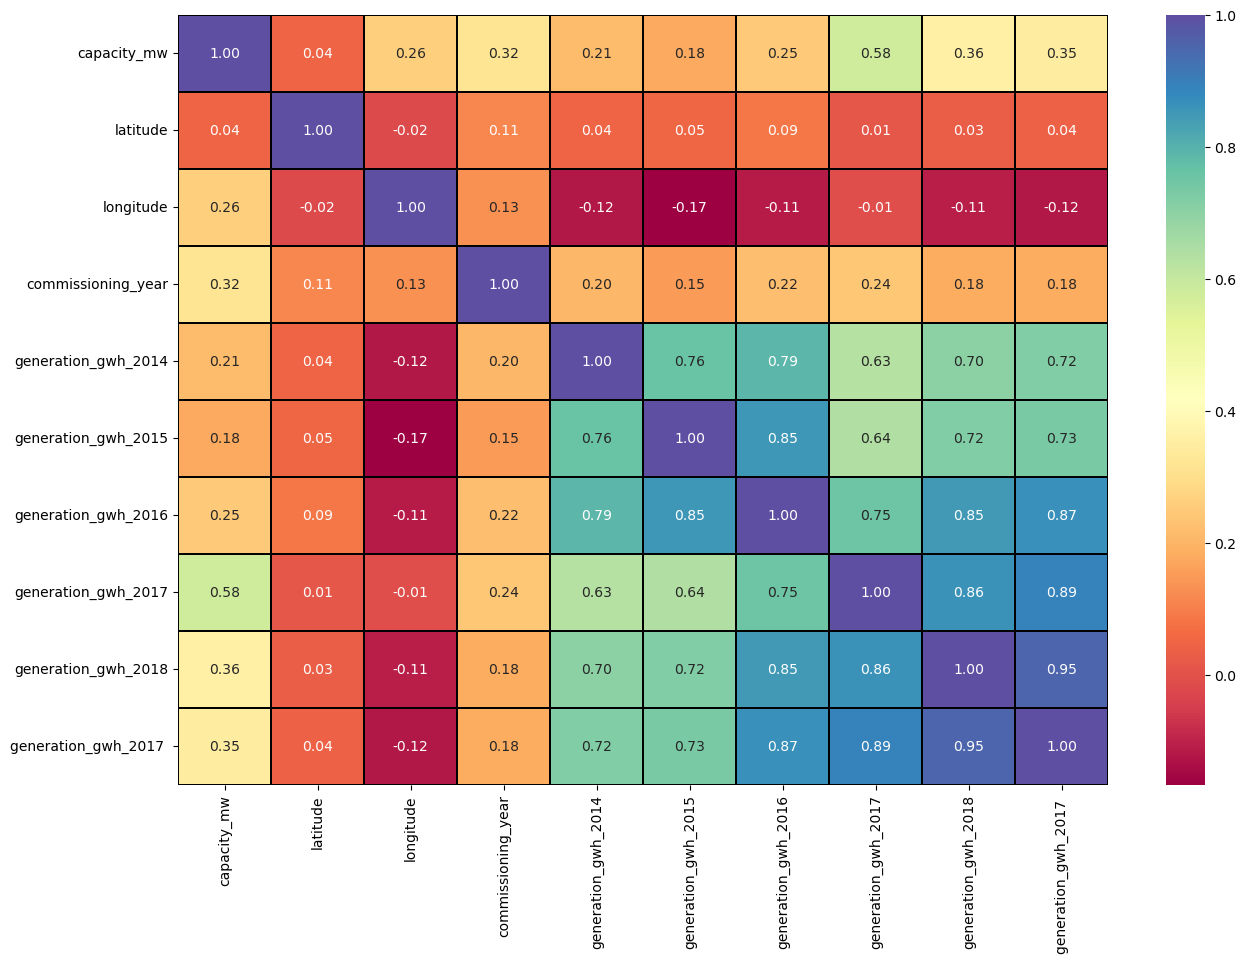

In [29]:
# thenwe checkthe coorelation between target and dependent variables
plt.figure(figsize=(15,10))
sns.heatmap(pdf1.corr(), linewidths = 0.2, fmt = '.2f', linecolor= 'black', annot = True, cmap = 'Spectral')
plt.show()

we see that few columnesare more positive correlation with target and few are negative correlated hence there all columns are more chnces 
to contributing to target therefore we build model with given all features

In [30]:
pdf1.dtypes

capacity_mw             float64
latitude                float64
longitude               float64
primary_fuel             object
other_fuel1              object
commissioning_year      float64
geolocation_source       object
generation_gwh_2014     float64
generation_gwh_2015     float64
generation_gwh_2016     float64
generation_gwh_2017     float64
generation_gwh_2018     float64
generation_gwh_2017     float64
dtype: object

In [21]:
#lets encoding categorical data to numeric one using one hot encoding
df_encode= pd.get_dummies(pdf1[['primary_fuel','other_fuel1','geolocation_source']],drop_first=False)
df_encode

,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,1,0,0,0,0,0,0,0,0,1,0,0,1
903,0,0,0,0,0,0,1,0,0,0,1,1,0,0
904,0,0,0,0,0,0,0,1,0,0,1,0,0,1
905,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [22]:
df=pd.concat([pdf1,df_encode],axis=1)
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,...,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,28.1839,4.183928,Solar,Oil,12.622267,National Renewable Energy Laboratory,13.447576,13.440944,13.513816,...,0,0,1,0,0,0,1,0,1,0
1,98.0,24.7663,4.209822,Coal,Oil,12.593099,WRI,13.447576,13.440944,13.513816,...,0,0,0,0,0,0,1,0,0,1
2,39.2,21.9038,4.108947,Wind,Oil,12.593099,WRI,13.447576,13.440944,13.513816,...,0,0,0,1,0,0,1,0,0,1
3,135.0,23.8712,4.503868,Gas,Oil,12.607604,WRI,8.516872,9.449397,9.604586,...,0,0,0,0,0,0,1,0,0,1
4,1800.0,21.9603,4.351694,Coal,Oil,12.630630,WRI,14.479241,18.086385,18.413278,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,4.260882,Coal,Oil,12.632719,WRI,13.447576,0.998289,6.158697,...,0,0,0,0,0,0,1,0,0,1
903,3.0,12.8932,4.275677,Solar,Oil,12.593099,Industry About,13.447576,13.440944,13.513816,...,0,0,1,0,0,0,1,1,0,0
904,25.5,15.2758,4.228027,Wind,Oil,12.593099,WRI,13.447576,13.440944,13.513816,...,0,0,0,1,0,0,1,0,0,1
905,80.0,24.3500,4.193560,Coal,Oil,12.593099,WRI,13.447576,13.440944,13.513816,...,0,0,0,0,0,0,1,0,0,1


In [23]:
# after encode we dropcolumns which is encoding from dataframe
df.drop(['primary_fuel','other_fuel1','geolocation_source'],axis=1,inplace=True)
df.shape

(860, 24)

In [24]:
# lets seperate the features and target variables
x = df.drop('capacity_mw',axis=1)
y = df['capacity_mw']

print(x.shape)
print(y.shape)

(860, 23)
(860,)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x)
x.head()


,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2017,primary_fuel_Biomass,...,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,28.1839,4.183928,12.622267,13.447576,13.440944,13.513816,2547.759305,13.752106,13.657969,0,...,0,0,1,0,0,0,1,0,1,0
1,24.7663,4.209822,12.593099,13.447576,13.440944,13.513816,2547.759305,13.752106,13.657969,0,...,0,0,0,0,0,0,1,0,0,1
2,21.9038,4.108947,12.593099,13.447576,13.440944,13.513816,2547.759305,13.752106,13.657969,0,...,0,0,0,1,0,0,1,0,0,1
3,23.8712,4.503868,12.607604,8.516872,9.449397,9.604586,663.774500,8.555526,8.723154,0,...,0,0,0,0,0,0,1,0,0,1
4,21.9603,4.351694,12.630630,14.479241,18.086385,18.413278,5385.579736,19.380155,17.528476,0,...,0,0,0,0,0,0,1,0,0,1


In [26]:
# now initialize model building
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [27]:
#then come to model initializing and training
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc= r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs= i
print('best accuracy is', maxacc, 'at random state', maxrs)        

best accuracy is 0.7045919912740318 at random state 103


In [29]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= 103)

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [31]:
rfc= RandomForestRegressor()
rfc.fit(x_train,y_train)
predrfc= rfc.predict(x_test)
print('r2score : ',r2_score(y_test,predrfc))
print('mean absolute error :', mean_absolute_error(y_test,predrfc))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,predrfc)))


r2score :  0.8332018643590315
mean absolute error : 101.43471498826324
root mean squared error : 186.3315606358357


In [34]:
gbt= GradientBoostingRegressor()
gbt.fit(x_train,y_train)
predgb= gbt.predict(x_test)
print('r2score : ',r2_score(y_test,predgb))
print('mean absolute error :', mean_absolute_error(y_test,predgb))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,predgb)))

r2score :  0.8393979931966683
mean absolute error : 104.56010129899457
root mean squared error : 182.83793567845996


In [33]:
svr= SVR()
svr.fit(x_train,y_train)
predsv= svr.predict(x_test)
print('r2 score:\n',r2_score(y_test,predsv))
print('mean absolute error :', mean_absolute_error(y_test,predsv))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,predsv)))

r2 score:
 -0.23045502145348795
mean absolute error : 274.4759786441141
root mean squared error : 506.08526985175814


In [36]:
dtr= DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddt= dtr.predict(x_test)
print('r2 score:\n',r2_score(y_test,preddt))
print('mean absolute error :', mean_absolute_error(y_test,preddt))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,preddt)))

r2 score:
 0.706347561402494
mean absolute error : 129.99691860465117
root mean squared error : 247.23367887800313


In [38]:
knn= knn(n_neighbors=5)
knn.fit(x_train,y_train)
predkn= knn.predict(x_test)
print('r2 score:\n',r2_score(y_test,predkn))
print('mean absolute error :', mean_absolute_error(y_test,predkn))
print('root mean squared error :', np.sqrt(mean_squared_error(y_test,predkn)))

r2 score:
 0.791147259039773
mean absolute error : 115.38362713178294
root mean squared error : 208.50233120044186


In [39]:
# for checking crossval score for our models
from sklearn.model_selection import cross_val_score

score= cross_val_score(rfc,x,y,cv=5)
print(score)
print('mean :',score.mean())
print('differnce between r2 score and cross validation score is:\n',(r2_score(y_test,predrfc)-score.mean())*100)

[0.80929378 0.8097748  0.73762621 0.79052532 0.80844679]
mean : 0.7911333825628519
differnce between r2 score and cross validation score is:
 4.206848179617961


In [41]:
score= cross_val_score(knn,x,y,cv=5)
print(score)
print('mean :',score.mean())
print('differnce between r2 score and cross validation score is:\n',(r2_score(y_test,predkn)-score.mean())*100)

[0.72263721 0.73642719 0.61770367 0.73584026 0.69344131]
mean : 0.7012099274966916
differnce between r2 score and cross validation score is:
 8.993733154308137


In [42]:
score= cross_val_score(dtr,x,y,cv=5)
print(score)
print('mean :',score.mean())
print('differnce between r2 score and cross validation score is:\n',(r2_score(y_test,preddt)-score.mean())*100)

[0.58253515 0.47895791 0.68682207 0.69061539 0.69894273]
mean : 0.6275746488700571
differnce between r2 score and cross validation score is:
 7.8772912532436905


In [43]:
score= cross_val_score(gbt,x,y,cv=5)
print(score)
print('mean :',score.mean())
print('differnce between r2 score and cross validation score is:\n',(r2_score(y_test,predgb)-score.mean())*100)

[0.80239938 0.79208015 0.71584922 0.70807987 0.76881852]
mean : 0.7574454284862715
differnce between r2 score and cross validation score is:
 8.19525647103968


In [44]:
score= cross_val_score(svr,x,y,cv=5)
print(score)
print('mean :',score.mean())
print('differnce between r2 score and cross validation score is:\n',(r2_score(y_test,predsv)-score.mean())*100)

[-0.16313893 -0.15274572 -0.17426287 -0.22847037 -0.15375382]
mean : -0.17447433918595504
differnce between r2 score and cross validation score is:
 -5.598068226753291


we see that  after checking cross validation the diffencebetween cv and r2 score is less in random foreset model therfore
we proceed with this model and also accuracy is greater than other models

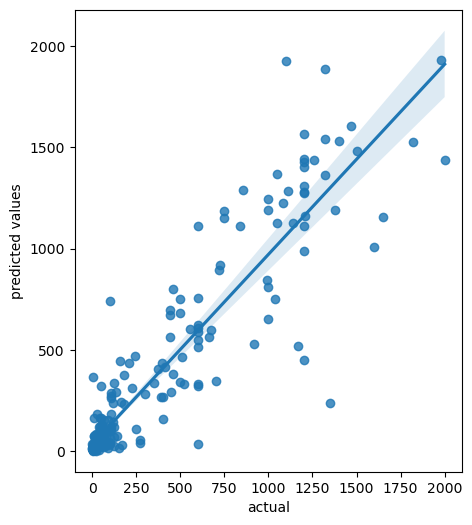

In [49]:
#lets check throgh graph of accuracy model
plt.figure(figsize=(5,6))
sns.regplot(x=y_test,y=predrfc,data=df)
plt.xlabel('actual')
plt.ylabel('predicted values')
plt.show()

now we can use hperperameter tuning to our final model to increasee there accuracy and performance and reduce bias and variation

In [50]:
from sklearn.model_selection import GridSearchCV

params= {'max_depth':[10,20,30],'min_samples_split':[8,10,5],'n_estimators':[10,50,100]}

In [51]:
grid_search = GridSearchCV(estimator=rfc,param_grid=params)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [8, 10, 5],
                         'n_estimators': [10, 50, 100]})

In [53]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

In [ ]:
final_model=